In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df=df.iloc[:,[7,0,1,2]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [5]:
df.isna().sum()

TEY    0
AT     0
AP     0
AH     0
dtype: int64

In [6]:
df.shape

(15039, 4)

In [7]:
df.describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.00000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174
std,15.829717,7.574323,6.41076,13.793439
min,100.170000,0.522300,985.85000,30.344000
25%,127.985000,11.408000,1008.90000,69.750000
50%,133.780000,18.186000,1012.80000,82.266000
75%,140.895000,23.862500,1016.90000,90.043500
max,174.610000,34.929000,1034.20000,100.200000


In [8]:
x=df.iloc[:,1:5]
y=df.iloc[:,0]
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [9]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [10]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(x, y,validation_split=0.33, epochs=150, batch_size=10)



Epoch 1/150


1008/1008 [==============================] - 6s 4ms/step - loss: -2856440.2500 - accuracy: 0.0000e+00 - val_loss: -11081071.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 4s 4ms/step - loss: -38372864.0000 - accuracy: 0.0000e+00 - val_loss: -75308408.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 4s 4ms/step - loss: -142050656.0000 - accuracy: 0.0000e+00 - val_loss: -215905072.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 4s 4ms/step - loss: -330262560.0000 - accuracy: 0.0000e+00 - val_loss: -444366560.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 4s 4ms/step - loss: -613500288.0000 - accuracy: 0.0000e+00 - val_loss: -770291904.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 4s 4ms/step - loss: -1001147072.0000 - accuracy: 0.0000e+00 - val_loss: -1202533248.0000 

Epoch 43/150
1008/1008 [==============================] - 4s 4ms/step - loss: -180124991488.0000 - accuracy: 0.0000e+00 - val_loss: -181392670720.0000 - val_accuracy: 0.0000e+00
Epoch 44/150
1008/1008 [==============================] - 4s 4ms/step - loss: -191833128960.0000 - accuracy: 0.0000e+00 - val_loss: -193056325632.0000 - val_accuracy: 0.0000e+00
Epoch 45/150
1008/1008 [==============================] - 4s 4ms/step - loss: -204025397248.0000 - accuracy: 0.0000e+00 - val_loss: -205190545408.0000 - val_accuracy: 0.0000e+00
Epoch 46/150
1008/1008 [==============================] - 4s 4ms/step - loss: -216714919936.0000 - accuracy: 0.0000e+00 - val_loss: -217818120192.0000 - val_accuracy: 0.0000e+00
Epoch 47/150
1008/1008 [==============================] - 4s 4ms/step - loss: -229910298624.0000 - accuracy: 0.0000e+00 - val_loss: -230943145984.0000 - val_accuracy: 0.0000e+00
Epoch 48/150
1008/1008 [==============================] - 4s 4ms/step - loss: -243619741696.0000 - accuracy: 0

Epoch 89/150
1008/1008 [==============================] - 4s 4ms/step - loss: -1365256175616.0000 - accuracy: 0.0000e+00 - val_loss: -1353376727040.0000 - val_accuracy: 0.0000e+00
Epoch 90/150
1008/1008 [==============================] - 4s 4ms/step - loss: -1409080098816.0000 - accuracy: 0.0000e+00 - val_loss: -1396583563264.0000 - val_accuracy: 0.0000e+00
Epoch 91/150
1008/1008 [==============================] - 4s 4ms/step - loss: -1453825064960.0000 - accuracy: 0.0000e+00 - val_loss: -1440702136320.0000 - val_accuracy: 0.0000e+00
Epoch 92/150
1008/1008 [==============================] - 4s 4ms/step - loss: -1499493695488.0000 - accuracy: 0.0000e+00 - val_loss: -1485706362880.0000 - val_accuracy: 0.0000e+00
Epoch 93/150
1008/1008 [==============================] - 4s 4ms/step - loss: -1546097786880.0000 - accuracy: 0.0000e+00 - val_loss: -1531658633216.0000 - val_accuracy: 0.0000e+00
Epoch 94/150
1008/1008 [==============================] - 4s 4ms/step - loss: -1593656213504.0000 - 

1008/1008 [==============================] - 3s 3ms/step - loss: -4378493714432.0000 - accuracy: 0.0000e+00 - val_loss: -4318115921920.0000 - val_accuracy: 0.0000e+00
Epoch 135/150
1008/1008 [==============================] - 3s 3ms/step - loss: -4472867127296.0000 - accuracy: 0.0000e+00 - val_loss: -4410830225408.0000 - val_accuracy: 0.0000e+00
Epoch 136/150
1008/1008 [==============================] - 3s 3ms/step - loss: -4568552833024.0000 - accuracy: 0.0000e+00 - val_loss: -4504850268160.0000 - val_accuracy: 0.0000e+00
Epoch 137/150
1008/1008 [==============================] - 3s 3ms/step - loss: -4665612173312.0000 - accuracy: 0.0000e+00 - val_loss: -4600217731072.0000 - val_accuracy: 0.0000e+00
Epoch 138/150
1008/1008 [==============================] - 3s 3ms/step - loss: -4763991670784.0000 - accuracy: 0.0000e+00 - val_loss: -4696863408128.0000 - val_accuracy: 0.0000e+00
Epoch 139/150
1008/1008 [==============================] - 3s 3ms/step - loss: -4863765774336.0000 - accuracy

In [11]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


470/470 [==============================] - 1s 2ms/step - loss: -6063093972992.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

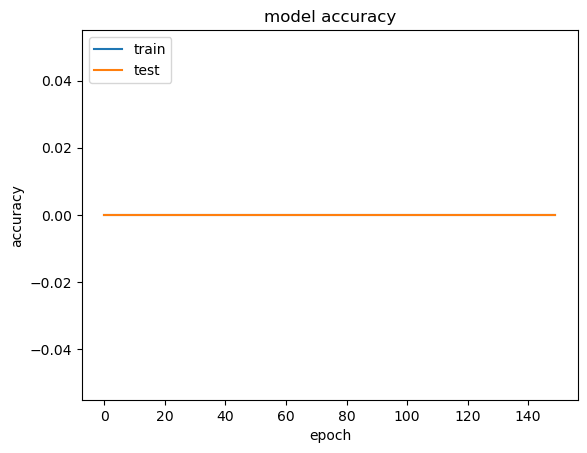

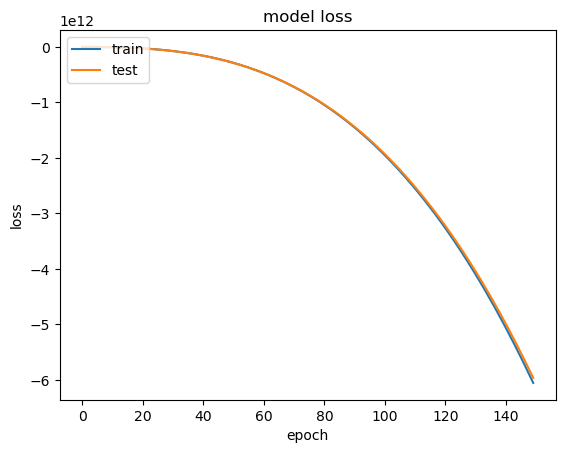

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [17]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .......batch_size=10, epochs=50

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 845, in _initialize
    self.target_encoder_ = self.target_encoder.fit(y)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\scikeras\utils\transformers.py", line 175, in fit
    raise ValueError(
ValueError: Unknown label type: continuous.

To implement support, subclass KerasClassifier and override ``target_encoder`` with a transformer that supports this label type.

For information on sklearn target types, see: * https://scikit-learn.org/stable/modules/generated/sklearn.utils.multiclass.type_of_target.html * https://scikit-learn.org/stable/modules/multiclass.html

For information on the SciKeras data transformation interface, see: * https://www.adriangb.com/scikeras/stable/advanced.html#data-transformers


In [18]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

NameError: name 'grid_result' is not defined

In [19]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

In [ ]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y_predict.round(),y.round()))